 # Machine Learning (ML) - Classification
 # Fetal Health
 
 
 ### __Installation & Import libraries:__

In [1]:
##!pip install xgboost
##!pip install -U imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
%matplotlib inline 
%config InlineBackend.figure_format = 'png'
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2 , f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Read the data :

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
df.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


## Data Cleaning:




## Rename of some columns:

In [4]:
df = df.rename(columns = {'baseline value': 'baseline_value','uterine_contractions': 'Uterine_contractions','severe_decelerations': 'Severe_Dcelerations','prolongued_decelerations': 'Prolongued_Decelerations','mean_value_of_short_term_variability':'mean_short_variability','mean_value_of_long_term_variability':'mean_long_variability','abnormal_short_term_variability': 'ABshort_variability','percentage_of_time_with_abnormal_long_term_variability': 'percentage_long_variability'}, inplace = False)

In [5]:
df.shape 

(2126, 22)

In [6]:
df.dtypes

baseline_value                 float64
accelerations                  float64
fetal_movement                 float64
Uterine_contractions           float64
light_decelerations            float64
Severe_Dcelerations            float64
Prolongued_Decelerations       float64
ABshort_variability            float64
mean_short_variability         float64
percentage_long_variability    float64
mean_long_variability          float64
histogram_width                float64
histogram_min                  float64
histogram_max                  float64
histogram_number_of_peaks      float64
histogram_number_of_zeroes     float64
histogram_mode                 float64
histogram_mean                 float64
histogram_median               float64
histogram_variance             float64
histogram_tendency             float64
fetal_health                   float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baseline_value               2126 non-null   float64
 1   accelerations                2126 non-null   float64
 2   fetal_movement               2126 non-null   float64
 3   Uterine_contractions         2126 non-null   float64
 4   light_decelerations          2126 non-null   float64
 5   Severe_Dcelerations          2126 non-null   float64
 6   Prolongued_Decelerations     2126 non-null   float64
 7   ABshort_variability          2126 non-null   float64
 8   mean_short_variability       2126 non-null   float64
 9   percentage_long_variability  2126 non-null   float64
 10  mean_long_variability        2126 non-null   float64
 11  histogram_width              2126 non-null   float64
 12  histogram_min                2126 non-null   float64
 13  histogram_max     

# Duplicated Data 

In [8]:
sum(df.duplicated())

13

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
sum(df.duplicated())

0

# Find Null

In [11]:
print("Does dataset rows have null values?:", df.isnull().values.any())
df.isnull().values.any()

Does dataset rows have null values?: False


False

In [12]:
df.sort_values(['fetal_health', 'fetal_health'], ascending=[True, True])

,baseline_value,accelerations,fetal_movement,Uterine_contractions,light_decelerations,Severe_Dcelerations,Prolongued_Decelerations,ABshort_variability,mean_short_variability,percentage_long_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.000,28.0,1.4,0.0,...,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,128.0,0.000,0.002,0.007,0.005,0.0,0.002,65.0,2.6,0.0,...,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0,3.0
2037,128.0,0.000,0.002,0.007,0.005,0.0,0.002,66.0,2.7,0.0,...,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,3.0
2038,128.0,0.000,0.002,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,63.0,192.0,6.0,0.0,104.0,94.0,115.0,28.0,0.0,3.0
2039,128.0,0.000,0.003,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0,3.0


In [13]:
df.fetal_health = np.where(df.fetal_health > 1.0, 2.0, df.fetal_health)

In [14]:
df.describe()

,baseline_value,accelerations,fetal_movement,Uterine_contractions,light_decelerations,Severe_Dcelerations,Prolongued_Decelerations,ABshort_variability,mean_short_variability,percentage_long_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.221013
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.415027
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,2.000000


# Find outlier

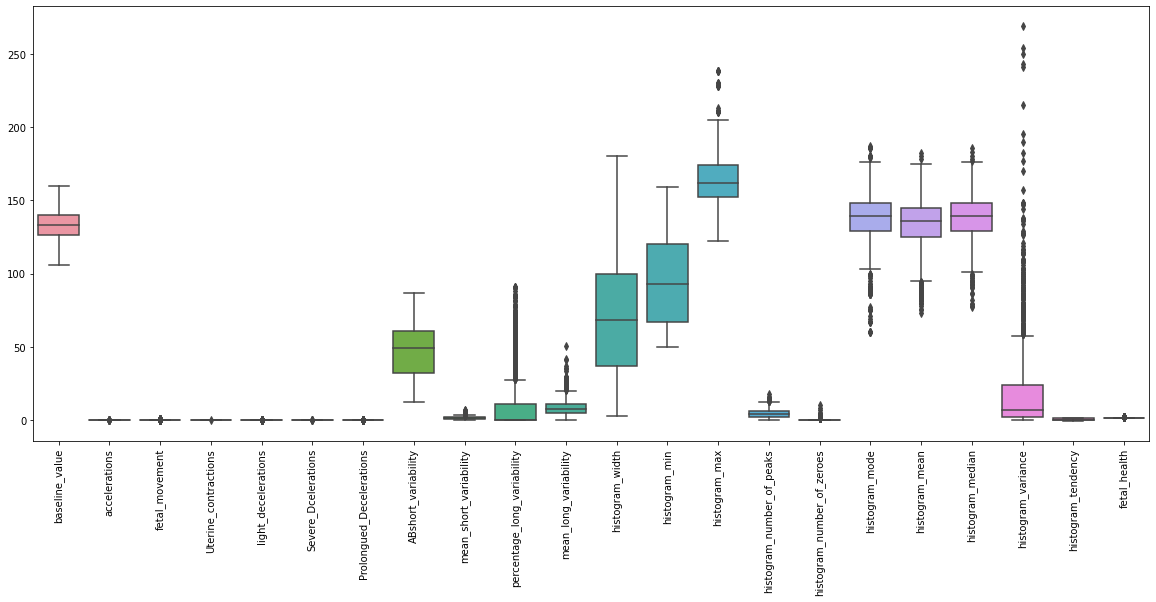

In [15]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.boxplot(data=df);

In [16]:
def clean_outlier(column):
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    IQR = q3 - q1
    
    min_range = q1 - 1.5 * IQR
    max_range = q3 + 1.5 * IQR
    
    mean = df[column].mean()
    df.loc[(df[column] < min_range), column] = mean
    df.loc[(df[column] > max_range), column] = mean
    
clean_outlier('histogram_median')
clean_outlier('percentage_long_variability')
clean_outlier('histogram_variance')
clean_outlier('histogram_mean')
clean_outlier('histogram_mode')
clean_outlier('histogram_max')
clean_outlier('histogram_number_of_zeroes')
clean_outlier('mean_short_variability')
clean_outlier('mean_long_variability')
clean_outlier('histogram_number_of_peaks')


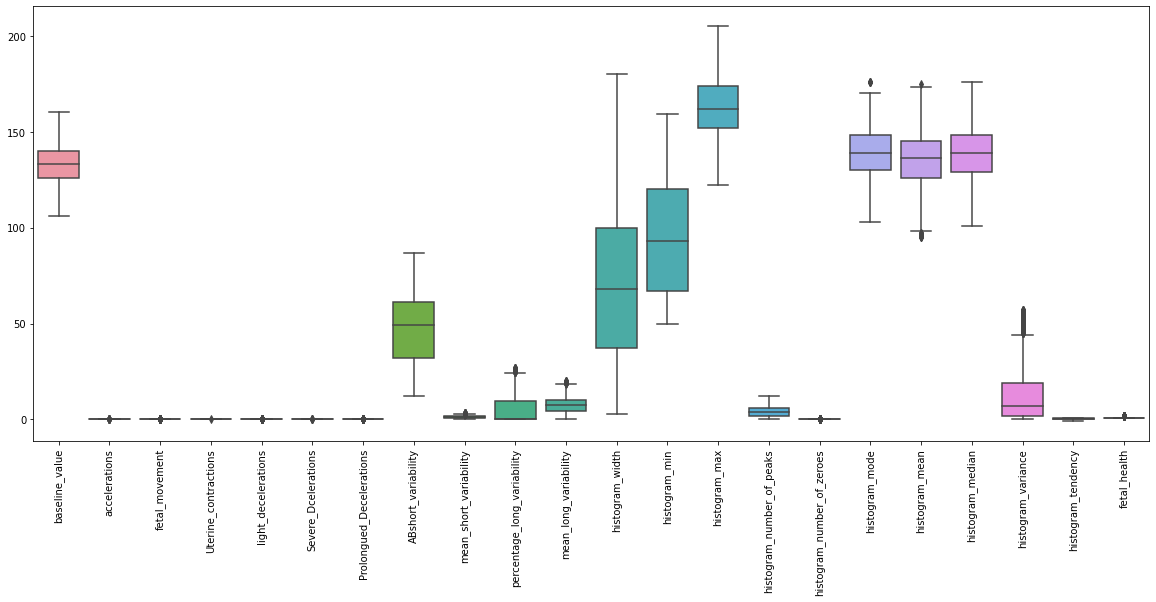

In [17]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.boxplot(data=df);

## EDA

- what is majority class of fetal health?

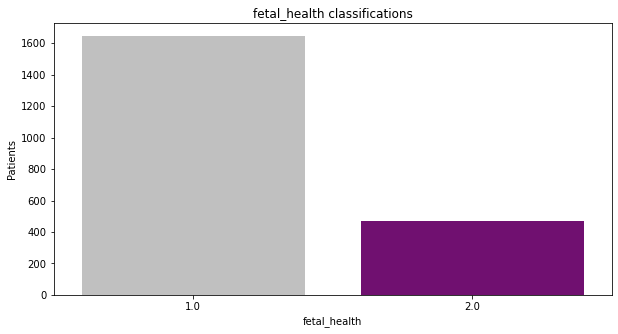

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(df["fetal_health"], alpha = 1, palette= ['silver','purple','pink'])
plt.title('fetal_health classifications')
plt.ylabel('Patients')

plt.show()

- Correlation between fetal health & other features


<AxesSubplot:>

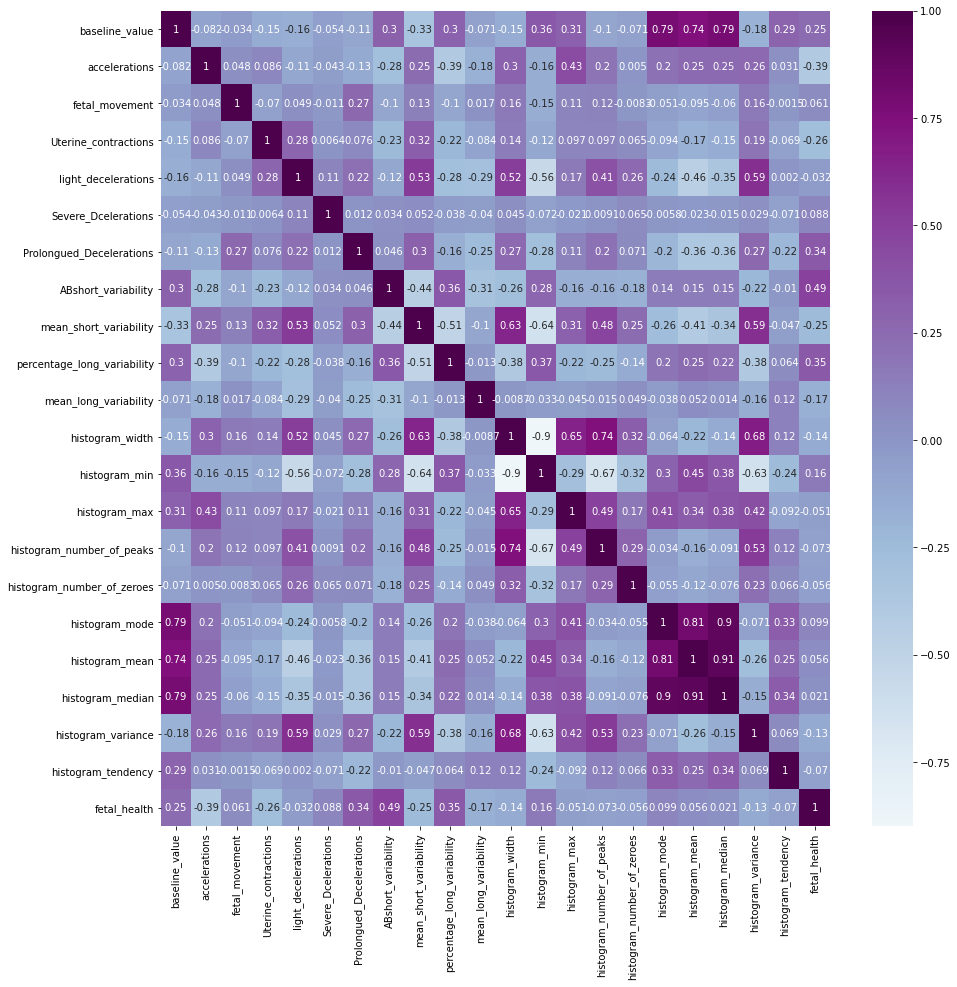

In [19]:

corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True ,cmap='BuPu', center=0)

- Distribution of the data and histogram 


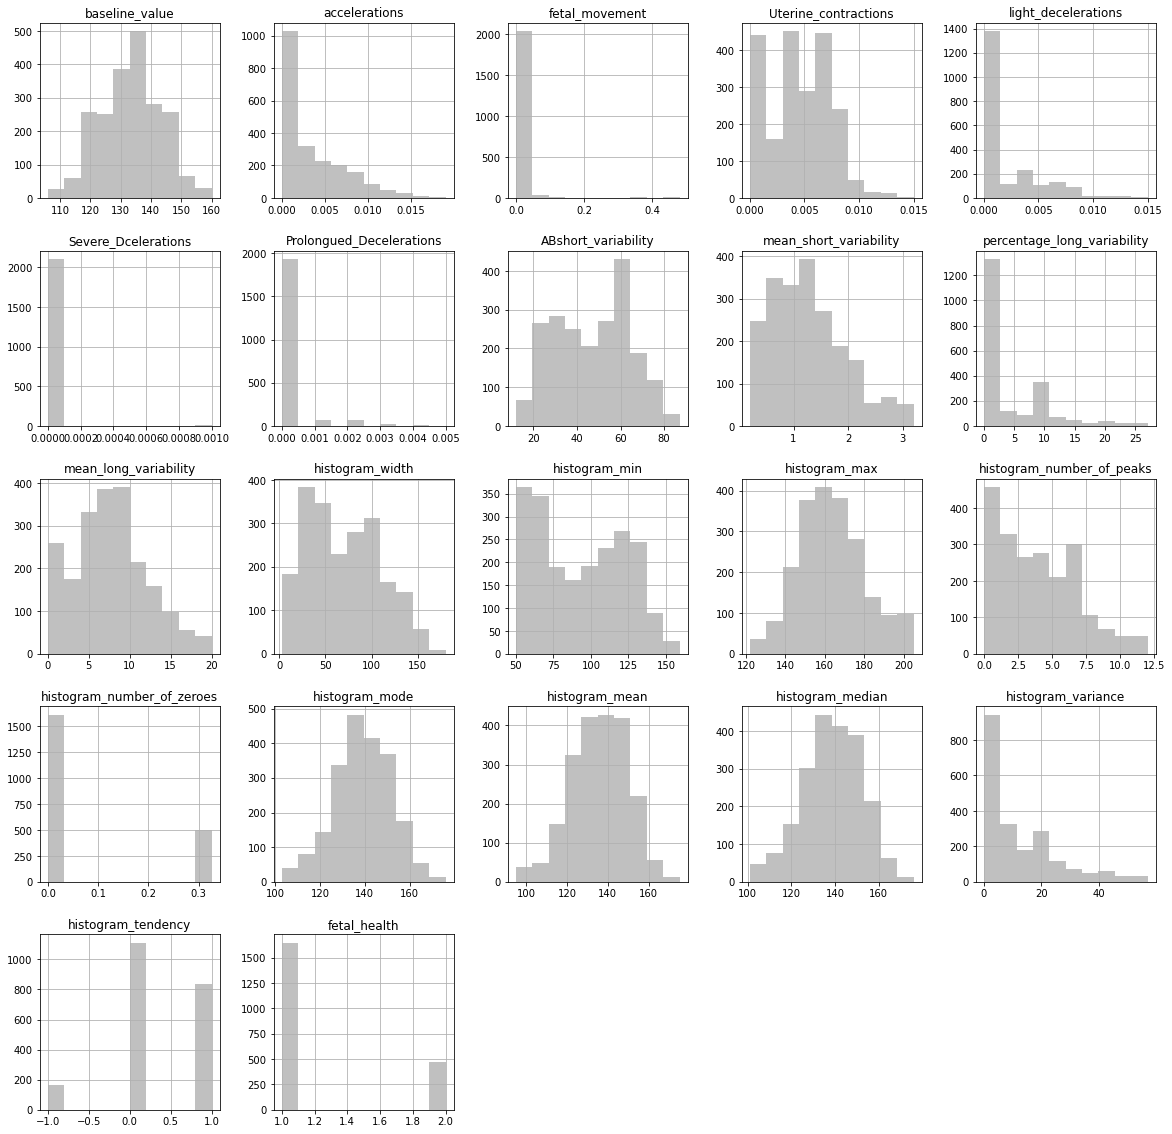

In [20]:
df.hist(color='silver',figsize = (20,20));

- We wanted to take a closer look at the histogram features. These features where values taken from the histogogram of the baseline fetal heart rate and the frequency of changes over time. These distribution of FHR changers over time are the same metrics that physicians use for their visual analysis of the CTG. Our initial thought was that these histogram values would be the key variables in determining fetal health class.

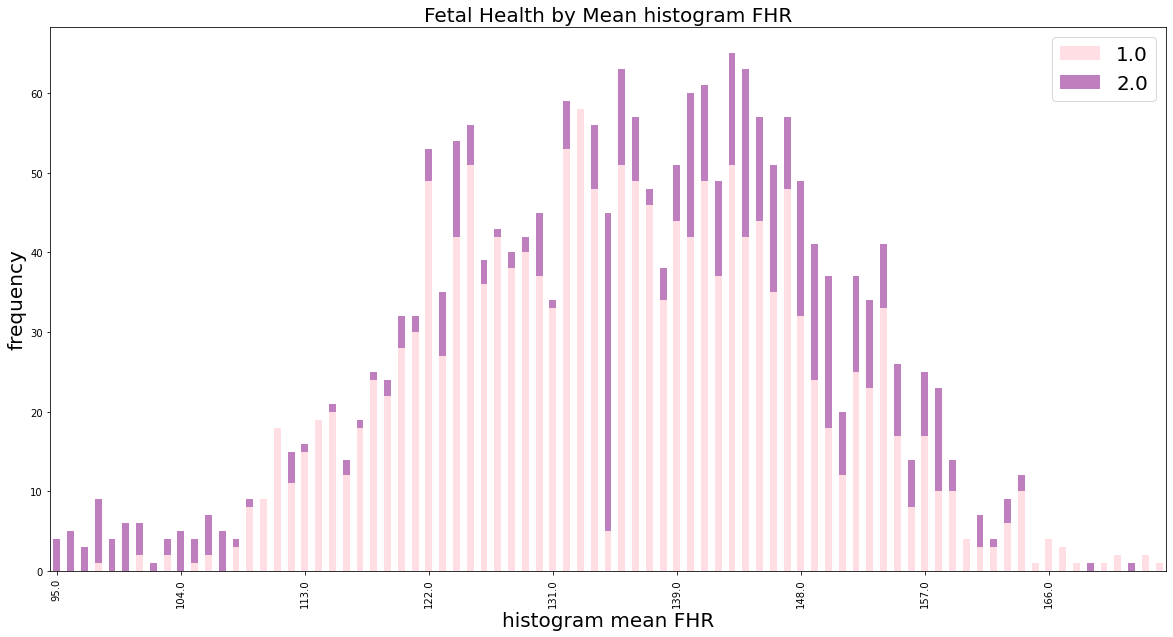

In [21]:
# #Histogram showing the histogram distribution values of average FHR by the Classes
histogram_min = df.groupby(['histogram_mean','fetal_health']).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['pink','purple'],
                       alpha = .5 ,figsize = (20,10))
pl.set_xlabel('histogram mean FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by Mean histogram FHR',fontsize=20)
plt.savefig('Thebike.png')





In the visualizations above you can see the distribution of the two classes for the feature values. In the histogram mean, you can see a clear section of the distribution only covered by our distressed class. This became a target for one of our engineered features.



- What is the relationship between Baseline Fetal Heart Rate and uterine contractions for Pathological fetal?


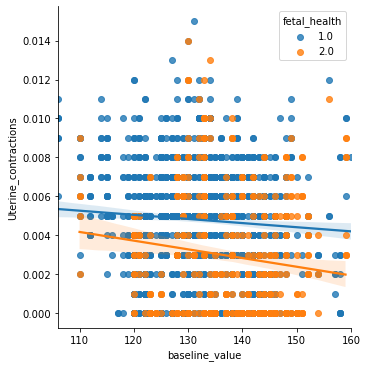

In [22]:
sns.lmplot(data =df,x='baseline_value', y='Uterine_contractions', hue="fetal_health",legend_out=False)
plt.show()

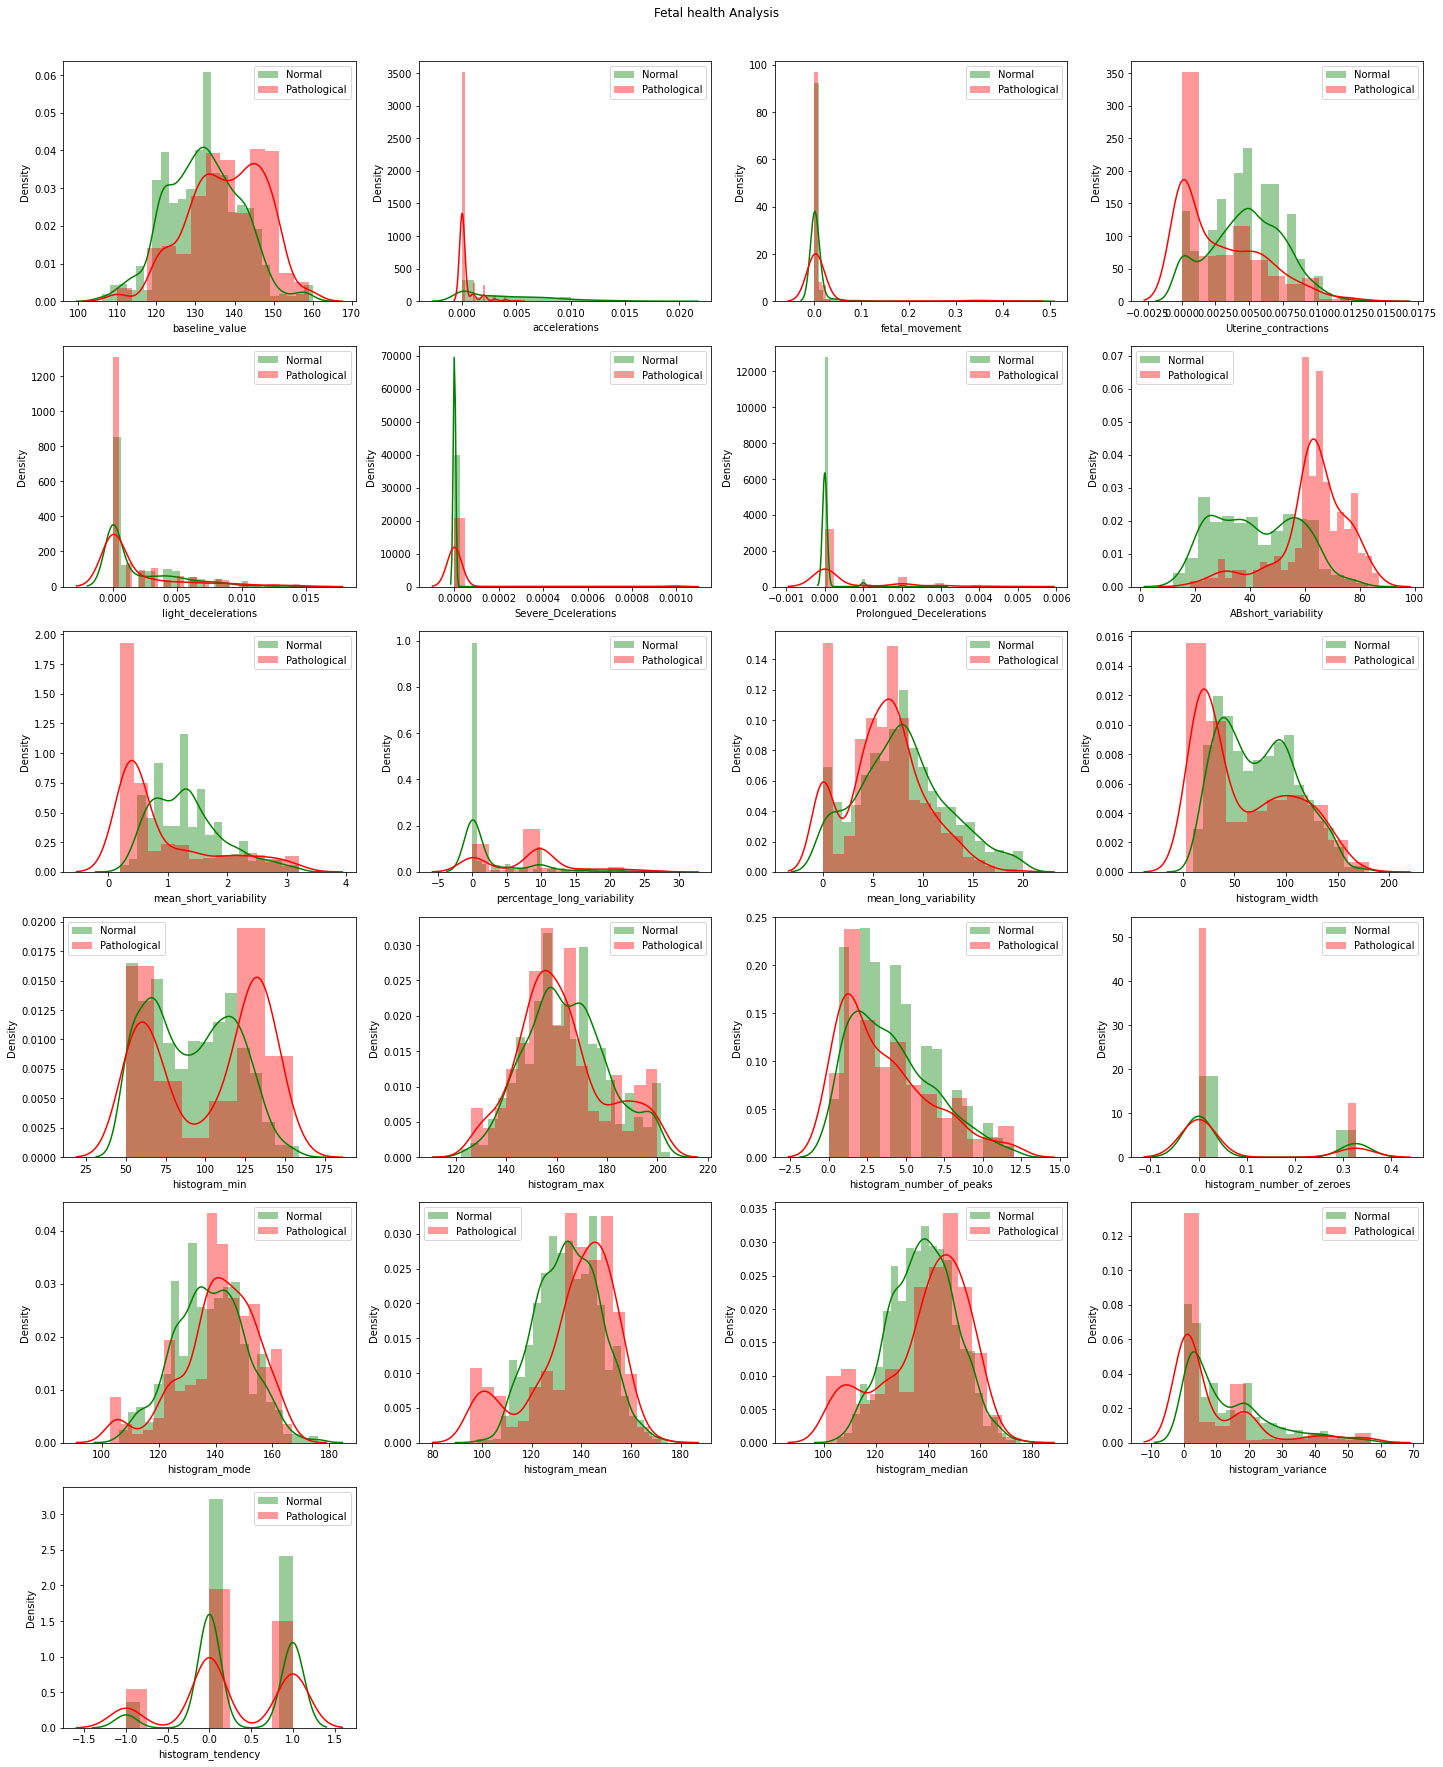

In [23]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns[:-1]:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['fetal_health']==1.0], color='g', label = 'Normal')
    sns.distplot(df[i][df['fetal_health']==2.0], color='r', label = 'Pathological')
    plt.legend(loc='best')
fig.suptitle('Fetal health Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Engineering 

In [24]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.preprocessing import LabelEncoder


In [25]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [26]:
df

,baseline_value,accelerations,fetal_movement,Uterine_contractions,light_decelerations,Severe_Dcelerations,Prolongued_Decelerations,ABshort_variability,mean_short_variability,percentage_long_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,9,0,0,0,0,0,0,61,3,10,...,12,3,2,0,16,43,20,19,2,1
1,21,6,0,6,3,0,0,5,20,0,...,18,76,7,1,38,42,40,12,1,0
2,22,3,0,8,3,0,0,4,20,0,...,18,76,6,1,38,41,37,13,1,0
3,23,3,0,8,3,0,0,4,23,0,...,3,48,12,0,33,39,36,13,2,0
4,21,7,0,8,0,0,0,4,23,0,...,3,48,10,0,33,42,37,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,29,0,0,7,0,0,0,67,0,26,...,87,55,4,0,50,56,52,2,1,1
2122,29,1,0,7,0,0,0,66,2,23,...,53,47,7,0,49,54,51,3,2,1
2123,29,1,0,7,0,0,0,67,2,21,...,53,48,6,0,50,54,52,4,2,1
2124,29,1,0,6,0,0,0,66,2,28,...,53,47,7,0,49,53,51,4,2,1


# Split Data

In [27]:
X = df.drop('fetal_health',axis=1)
y= df.fetal_health

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

- Balance Data 

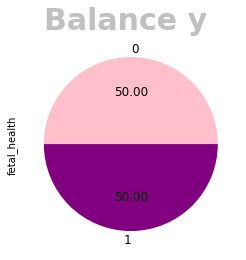

In [28]:
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)
plt.title('Balance y ',fontsize = 30, weight = 'bold', color='silver');
y_oversample.value_counts().plot.pie(fontsize = 12,colors= ['pink','purple'],autopct='%.2f');

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

In [30]:
print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = chi2, percentile=40) # score_func can = f_classif
A = FeatureSelection.fit_transform(X,y)

Original X Shape is  (2113, 21)


In [31]:
print('Selected Features are : ' , FeatureSelection.get_support())

Selected Features are :  [ True  True False False False False False  True  True  True  True  True
  True False False False False False False False False]


In [32]:
X_train.head(10)

,baseline_value,accelerations,fetal_movement,Uterine_contractions,light_decelerations,Severe_Dcelerations,Prolongued_Decelerations,ABshort_variability,mean_short_variability,percentage_long_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
366,24,0,19,2,0,0,0,51,2,10,...,4,83,18,1,0,32,42,36,0,1
1830,29,0,1,2,8,0,0,48,11,0,...,90,15,36,8,1,39,39,43,28,2
116,12,0,0,7,2,0,2,14,12,0,...,142,0,74,9,1,22,10,12,19,1
646,12,0,0,4,0,0,0,48,4,0,...,48,34,13,4,0,21,29,25,2,2
341,22,0,0,0,0,0,0,61,1,10,...,4,81,16,1,0,30,39,34,0,1
1810,32,0,0,3,0,0,0,55,1,4,...,21,83,35,1,0,43,51,47,1,1
439,40,0,0,6,6,0,0,41,28,3,...,145,1,78,12,1,53,53,55,19,2
1656,3,0,0,8,0,0,0,52,3,0,...,22,50,3,1,0,12,19,15,1,1
30,21,0,67,2,10,0,0,14,12,0,...,145,0,77,10,0,29,25,25,57,1
551,25,10,0,6,0,0,0,23,12,0,...,144,2,78,6,1,43,56,51,19,2


In [33]:
'baseline_value','accelerations','ABshort_variability','mean_short_variability','percentage_long_variability','histogram_width','histogram_min','histogram_max'

('baseline_value',
 'accelerations',
 'ABshort_variability',
 'mean_short_variability',
 'percentage_long_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max')

In [34]:
y=df["fetal_health"]
df= df.filter(['baseline_value','accelerations','ABshort_variability','mean_short_variability','percentage_long_variability','histogram_width','histogram_min','histogram_max'], axis=1)
X=df

In [35]:
df.columns

Index(['baseline_value', 'accelerations', 'ABshort_variability',
       'mean_short_variability', 'percentage_long_variability',
       'histogram_width', 'histogram_min', 'histogram_max'],
      dtype='object')

In [36]:
type(df)

pandas.core.frame.DataFrame

In [37]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.2, random_state=17)

# ML models


- Here I take different machine learning algorithm and try find algorithm which predict accurately.


## Logistic Regression

confussion matrix
[[299  30]
 [ 33  61]]


Accuracy of Logistic Regression: 85.1063829787234 

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       329
           1       0.67      0.65      0.66        94

    accuracy                           0.85       423
   macro avg       0.79      0.78      0.78       423
weighted avg       0.85      0.85      0.85       423



C:\Users\bl202\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


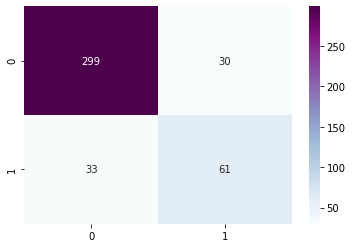

In [38]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
sns.heatmap(lr_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

### Naive Bayes Model


confussion matrix
[[275  54]
 [ 22  72]]


Accuracy of Naive Bayes model: 82.03309692671394 

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       329
           1       0.57      0.77      0.65        94

    accuracy                           0.82       423
   macro avg       0.75      0.80      0.77       423
weighted avg       0.85      0.82      0.83       423



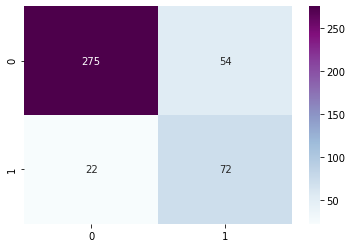

In [39]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
sns.heatmap(nb_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

### Random Forest 


In [40]:
#parameter grid for grid search with lists of estimators, both criterion, a list of max depths sqrt max features 
#and a list of min weight fraction leaf
parameters = {
    'n_estimators': [25,50,100,300,500],
    'criterion' : ['gini','entropy'],
    'max_depth' : [8,9,10,11,12],
    'max_features' : ['sqrt'],
    'min_weight_fraction_leaf' : [0,0.1,0.3,0.5],
    
    
    
}

In [41]:
grid_tree=GridSearchCV(RandomForestClassifier(), parameters, cv=15, scoring='f1', verbose=1, n_jobs=-1)


confussion matrix
[[325   4]
 [ 28  66]]


Accuracy of Random Forest: 92.43498817966903 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       329
           1       0.94      0.70      0.80        94

    accuracy                           0.92       423
   macro avg       0.93      0.84      0.88       423
weighted avg       0.93      0.92      0.92       423



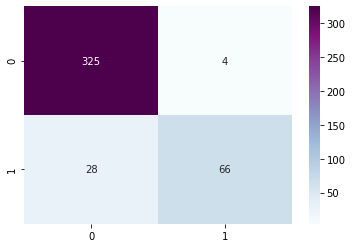

In [42]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
sns.heatmap(rf_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

## Extreme Gradient Boost (xgb)

In [43]:
xgb=XGBClassifier()

In [44]:
xgb=XGBClassifier(colsample_bytree= 0.6, gamma= 1.5, max_depth= 5,min_child_weight= 1,subsample= 1.0)

In [45]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)


In [46]:
X_train.columns

Index(['baseline_value', 'accelerations', 'ABshort_variability',
       'mean_short_variability', 'percentage_long_variability',
       'histogram_width', 'histogram_min', 'histogram_max'],
      dtype='object')

In [47]:
xgb.fit(X_train, y_train)

C:\Users\bl202\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=0.6,
              colsample_bynode=0.5, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.6, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
              seed=27, subsample=0.52, tree_method='exact',
              validate_parameters=1, verbosity=None)

confussion matrix
[[325   4]
 [ 43  51]]


Accuracy of Extreme Gradient Boost: 88.88888888888889 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       329
           1       0.93      0.54      0.68        94

    accuracy                           0.89       423
   macro avg       0.91      0.77      0.81       423
weighted avg       0.89      0.89      0.88       423



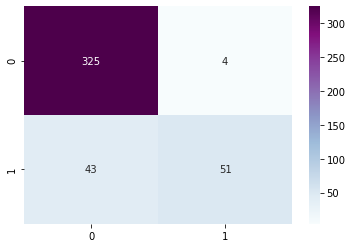

In [48]:
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
sns.heatmap(xgb_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

## K-Nearest Neighbour

In [49]:
knn=KNeighborsClassifier()
k_range = list(range(1,30))

param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)
print("Best params:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Best score:", grid.best_score_)

Best params: {'n_neighbors': 1}
Best estimator: KNeighborsClassifier(n_neighbors=1)
Best score: 0.9047337278106509


confussion matrix
[[321   8]
 [ 39  55]]


Accuracy of K-NeighborsClassifier: 88.88888888888889 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       329
           1       0.87      0.59      0.70        94

    accuracy                           0.89       423
   macro avg       0.88      0.78      0.82       423
weighted avg       0.89      0.89      0.88       423



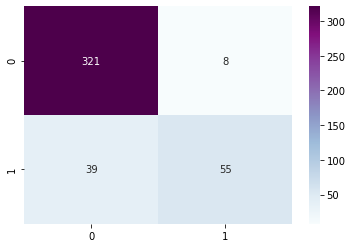

In [50]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
sns.heatmap(knn_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))


### Decision Tree

In [51]:
param_dict_dt_de = {

    
    'criterion': ['gini','entropy'],
    "random_state":[0],
    "max_depth" : [6]
    
}

In [52]:
dt_3 = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt_3,
                   param_grid=param_dict_dt_de,
                   cv=5,
                   verbose=1,
                   n_jobs=-1)
grid_dt.fit(X_train,y_train)
print("Best params:", grid_dt.best_params_)
print("Best estimator:", grid_dt.best_estimator_)
print("Best score:", grid_dt.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best params: {'criterion': 'entropy', 'max_depth': 6, 'random_state': 0}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
Best score: 0.9011834319526628


confussion matrix
[[300  29]
 [ 17  77]]


Accuracy of DecisionTreeClassifier: 89.12529550827422 

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       329
           1       0.73      0.82      0.77        94

    accuracy                           0.89       423
   macro avg       0.84      0.87      0.85       423
weighted avg       0.90      0.89      0.89       423



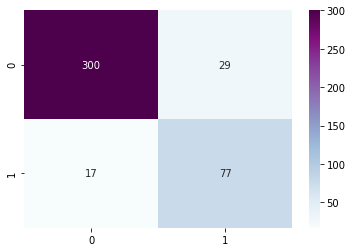

In [53]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
sns.heatmap(dt_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))


## Support Vector Classifier SVC

confussion matrix
[[319  10]
 [ 32  62]]


Accuracy of Support Vector Classifier: 90.0709219858156 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       329
           1       0.86      0.66      0.75        94

    accuracy                           0.90       423
   macro avg       0.88      0.81      0.84       423
weighted avg       0.90      0.90      0.90       423



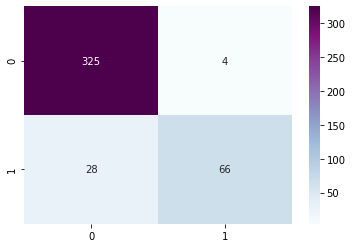

In [54]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
sns.heatmap(rf_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

In [55]:
from sklearn import preprocessing


In [56]:
from sklearn.metrics import roc_curve

In [57]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
    

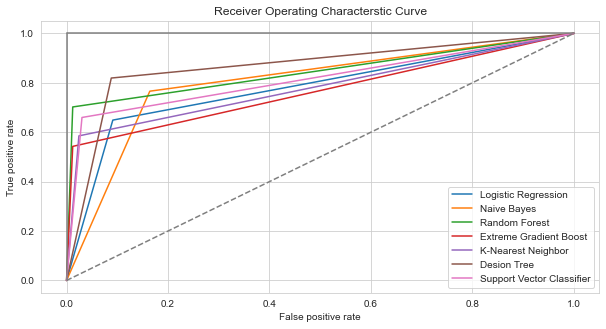

In [58]:
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## Ensembling


In [59]:
from mlxtend.classifier import StackingCVClassifier

confussion matrix
[[300  29]
 [ 15  79]]


Accuracy of StackingCVClassifier: 89.59810874704492 

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       329
           1       0.73      0.84      0.78        94

    accuracy                           0.90       423
   macro avg       0.84      0.88      0.86       423
weighted avg       0.90      0.90      0.90       423



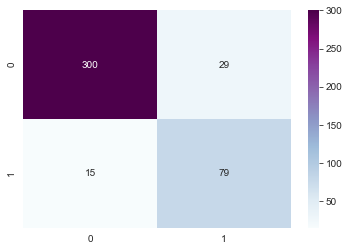

In [60]:
scv=StackingCVClassifier(classifiers=[nb,knn,dt],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
sns.heatmap(scv_conf_matrix,cmap="BuPu",annot= True,fmt='g')
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

In [61]:
scv=StackingCVClassifier(classifiers=[nb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[316  13]
 [ 30  64]]


Accuracy of StackingCVClassifier: 89.83451536643025 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       329
           1       0.83      0.68      0.75        94

    accuracy                           0.90       423
   macro avg       0.87      0.82      0.84       423
weighted avg       0.90      0.90      0.89       423



In [62]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[05:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bl202\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bl202\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bl202\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[05:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[318  11]
 [ 24  70]]


Accuracy of StackingCVClassifier: 91.725768321513 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       329
           1       0.86      0.74      0.80        94

    accuracy                           0.92       423
   macro avg       0.90      0.86      0.87       423
weighted avg       0.92      0.92      0.91       423



In [63]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.106383
1,Naive Bayes,82.033097
2,Random Forest,92.434988
3,Extreme Gradient Boost,88.888889
4,K-Nearest Neighbour,88.888889
5,Decision Tree,89.125296
6,Support Vector Machine,90.070922


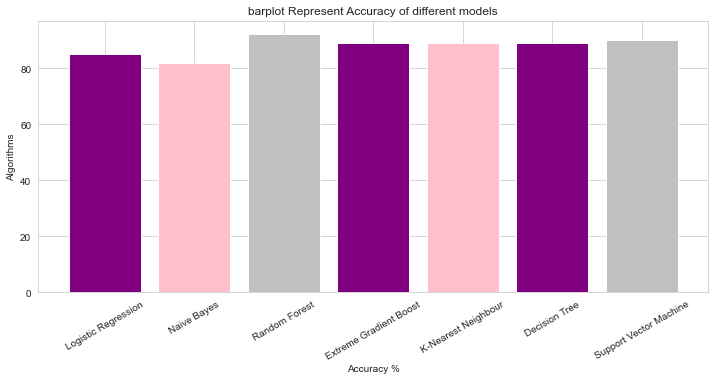

In [64]:
colors = ['purple','pink','silver','purple','pink','purple','silver',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.xticks(rotation=30)

plt.show()

In [66]:
from sklearn.metrics import plot_precision_recall_curve


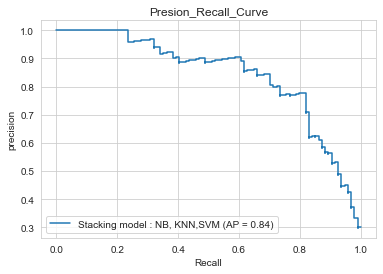

In [67]:
plot_precision_recall_curve(svc,X_test,y_test, ax=plt.gca(),name="Stacking model : NB, KNN,SVM")

#Plot title 
plt.title('Presion_Recall_Curve')
# Axis labale 
plt.xlabel('Recall')
plt.ylabel('precision')

#Show the legend 
plt.legend()
plt.show()

The end.. after evaluate all model we concluded the Random Forest Model is best acuracy

